In [1]:
# Imports:
import os
import pandas as pd
import numpy as np

# Disable FutureWarnings:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
directory_path = os.path.abspath("Processed_Data")
file_list = os.listdir(directory_path)
file_list

['SPACallback-Apr17-Mar18.csv',
 'SPACallback-Apr18-Mar19.csv',
 'SPACallback-Apr19-Mar20.csv',
 'SPACallback-Apr20-Mar21.csv',
 'SPACallback-Apr21-Mar22.csv',
 'SPACallback-Apr22-Mar23.csv',
 'SPACallback-Apr23-Jun23.csv']

In [3]:
def append_csv_files(file_list):
    dfs = []
    for file_name in file_list:
        # Combine directory path and file name:
        file_path = os.path.join(directory_path, file_name)
        # Read each Excel file into a DataFrame:
        single_df = pd.read_csv(file_path)
        # Append the DataFrame to the list:
        dfs.append(single_df)
    # Concatenate all DataFrames in the list:
    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

In [4]:
df = append_csv_files(file_list)

# Remove NaN values from the DataFrame:
df = df.dropna()

# Save the DataFrame as an Excel file:
df.to_csv('Combined_SPA_Callback.csv', index=False)

In [5]:
from sentence_transformers import SentenceTransformer

# Choosing SentenceTransformer model:
model = SentenceTransformer('all-MiniLM-L6-v2')

# Creating embeddings from sentences:
sentences = list(df["Text"])
embeddings = model.encode(sentences)

In [6]:
from sklearn.cluster import AffinityPropagation

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# Perform Affinity Propogation to create clusters of embeddings:
embedding_cluster = AffinityPropagation(damping=0.55, max_iter=300, preference =-14, random_state=42).fit(embeddings)
no_of_iterations = embedding_cluster.n_iter_
no_of_clusters = len(embedding_cluster.cluster_centers_)
no_of_labels = len(embedding_cluster.labels_)
print("{} Embeddings divided into {} Clusters made in {} Iterations.".format(no_of_labels, no_of_clusters, no_of_iterations))

# Metrics:
chi = calinski_harabasz_score(embeddings, embedding_cluster.labels_)
dbi = davies_bouldin_score(embeddings, embedding_cluster.labels_)
sil = silhouette_score(embeddings, embedding_cluster.labels_)
print("CHI:{}\nDBI:{}\nSil:{}".format(chi, dbi, sil))

11358 Embeddings divided into 52 Clusters made in 164 Iterations.
CHI:64.44546042853989
DBI:4.31372702182739
Sil:0.0189349502325058


In [7]:
from sklearn.manifold import TSNE

# Perform dimensionality reduction with t-SNE
tsne = TSNE(n_components=2, init='pca', random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

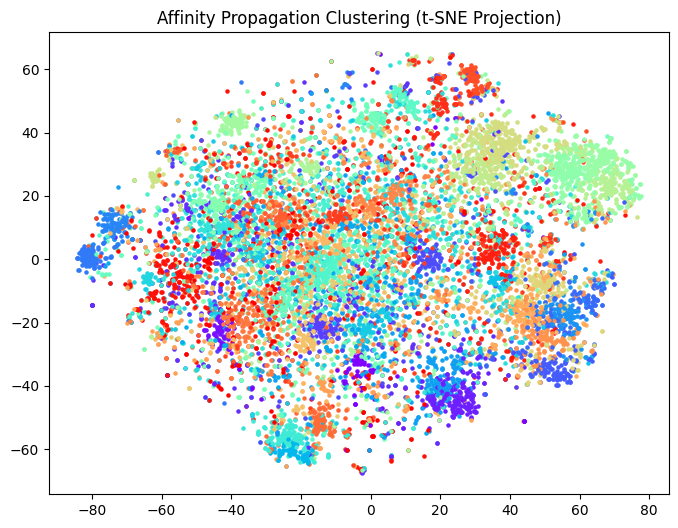

In [8]:
import matplotlib.pyplot as plt

# Visualize the clustering results in 2D:
plt.figure(figsize=(8, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, no_of_clusters))
for i in range(len(embeddings_2d)):
    plt.scatter(embeddings_2d[i][0], embeddings_2d[i][1], color = colors[embedding_cluster.labels_[i]], s=5)

plt.title('Affinity Propagation Clustering (t-SNE Projection)')
plt.show()